In [1]:
#Importing libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading data
dataset= load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleaning 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\LENOVO\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Job Location

In [2]:
df_VN = df[
    (df['job_country'] == 'Vietnam') & 
    (df['job_title_short'].isin(['Business Analyst', 'Data Analyst', 'Senior Data Analyst']))
]


In [3]:
#Clean location
location_mapping = {
    # Ho Chi Minh City Variations
    'Ho Chi Minh City, Vietnam': 'Ho Chi Minh City',
    'Tân Bình, Ho Chi Minh City, Vietnam': 'Ho Chi Minh City',
    'Ho Chi Minh City': 'Ho Chi Minh City',  # Standard format
    'Ho Chi Minh City, Vietnam ': 'Ho Chi Minh City',

    # Hanoi Variations
    'Hanoi, Vietnam': 'Hanoi',
    'Hanoi, Hoàn Kiếm, Hanoi, Vietnam': 'Hanoi',
    
    # Da Nang Variations
    'Da Nang, Hải Châu District, Da Nang, Vietnam': 'Da Nang',
    'Da Nang, Vietnam ': 'Da Nang',
    'Da Nang': 'Da Nang',  # Standard format

    # Binh Duong Variations
    'Binh Duong, Vietnam': 'Binh Duong',
    'Bến Cát, Binh Duong, Vietnam': 'Binh Duong',

    # Dong Nai
    'Dong Nai, Vietnam': 'Dong Nai',

    # Thua Thien Hue
    'Thua Thien Hue, Vietnam': 'Thua Thien Hue',

    # Binh Dinh
    'Bình Định, Vietnam': 'Binh Dinh',

    # Quang Nam
    'Quảng Nam, Vietnam': 'Quang Nam',

    # Quang Ngai
    'Quảng Ngãi, Quang Ngai, Vietnam': 'Quang Ngai',

    # Bac Giang
    'Bắc Giang, Bac Giang, Vietnam': 'Bac Giang',

    # General Vietnam mentions
    'Vietnam ': 'Vietnam',
    'Vietnam (+1 other)': 'Vietnam',
    'Vietnam (+3 others)': 'Vietnam',
    
    
    'Anywhere': 'Anywhere'
    
}


In [4]:
# df_VN
df_VN['job_location'] = df_VN['job_location'].replace(location_mapping)
df_plot = df_VN['job_location'].value_counts().head(5).to_frame().reset_index()
df_plot.columns = ['job_location', 'count']

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_336\3048005517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VN['job_location'] = df_VN['job_location'].replace(location_mapping)


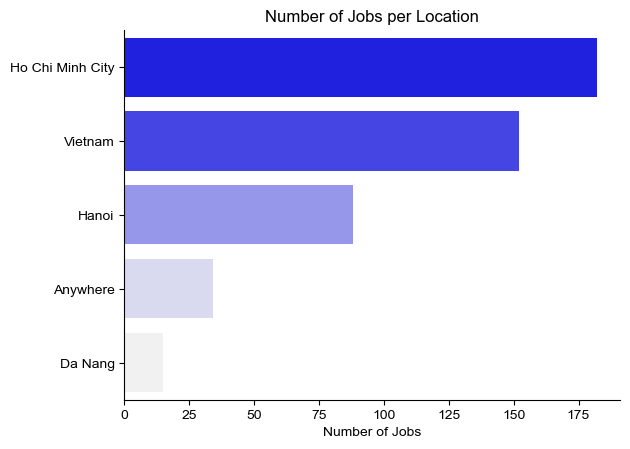

In [5]:
sns.barplot(data=df_plot, x='count',y='job_location', hue='count', palette='light:b', legend=False)
sns.set_theme(style='ticks')

sns.despine()
plt.title('Number of Jobs per Location')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

# Benefits Offered

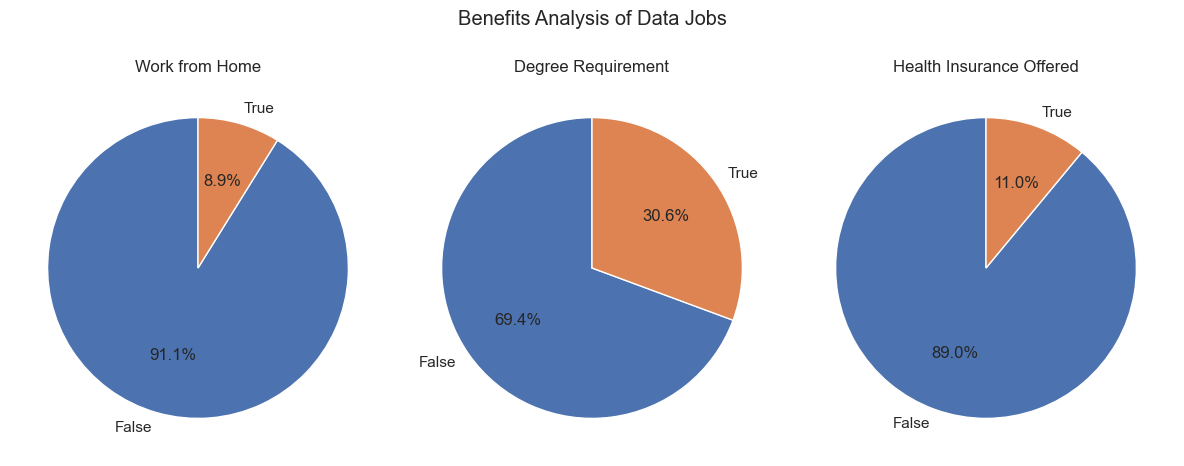

In [6]:
status_dict = {
    'job_work_from_home':'Work from Home',
    'job_no_degree_mention':'Degree Requirement',
    'job_health_insurance':'Health Insurance Offered'
}

fig,ax = plt.subplots(1,3)
fig.set_size_inches(12,5)

for i, (column,title) in enumerate(status_dict.items()): 
    ax[i].pie(df[column].value_counts(),labels=['False','True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)


fig.suptitle('Benefits Analysis of Data Jobs')
fig.tight_layout()
plt.show()


# Companies to Explore

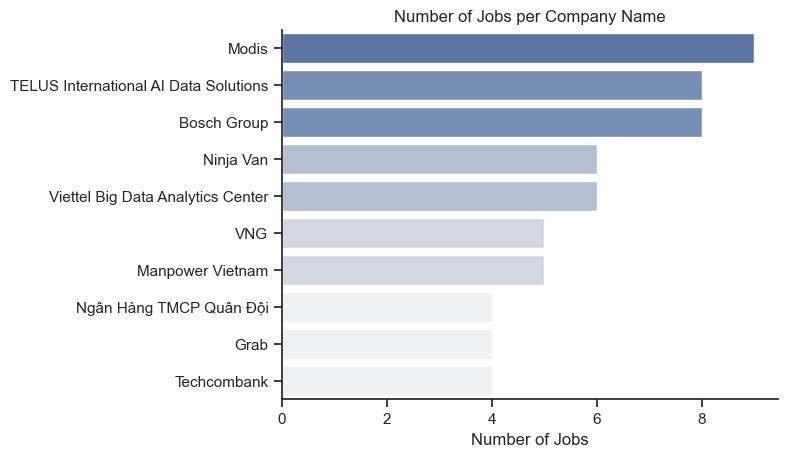

In [7]:
df_plot2 = df_VN['company_name'].value_counts().head(10).to_frame().reset_index()
df_plot2.columns = ['company_name', 'count']

sns.barplot(data=df_plot2, x='count',y='company_name', hue='count', palette='light:b', legend=False)
sns.set_theme(style='ticks')

sns.despine()
plt.title('Number of Jobs per Company Name')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

# Data Jobs Market Demand

In [8]:
df_VN['job_posted_month'] = df_VN['job_posted_date'].dt.month
df_VN.index.name = 'job_id'

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_336\2144190071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_VN['job_posted_month'] = df_VN['job_posted_date'].dt.month


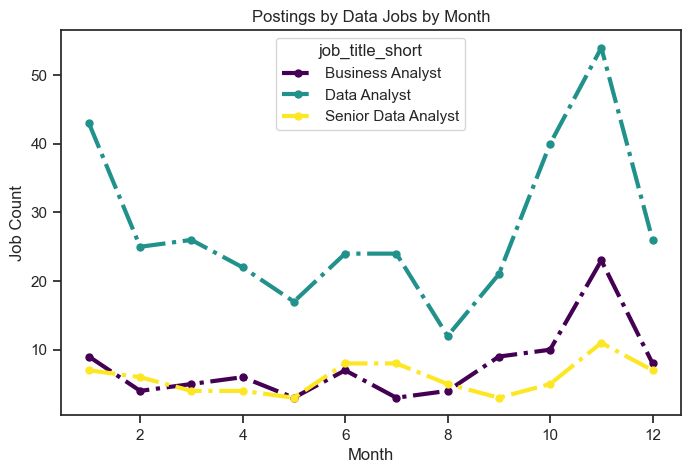

In [30]:
df_VN.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size').plot(kind='line',linewidth=3,linestyle='-.',colormap='viridis',marker='o',markersize=5,figsize=(8,5))
plt.title('Postings by Data Jobs by Month')
plt.xlabel('Month')
plt.ylabel('Job Count')
plt.show()